In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from src.basic.load_network import load_mtx
from src.metrics.search_information import average_search_information
from src.metrics.loops import count_triangles, count_squares
from src.plot.degree_distribution import plot_degree_distribution

# Carga

In [5]:
filepath = "../data/road-euroroad.mtx"
G = load_mtx(filepath)
print(f"Grafo carregado: {G.number_of_nodes()} nós e {G.number_of_edges()} arestas. Densidade: {nx.density(G):.5f}")

Grafo carregado: 1174 nós e 1417 arestas. Densidade: 0.00206


# Exploratória inicial

In [6]:
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
G_largest = G.subgraph(largest_component).copy()

print(f"Número de componentes conexos: {len(components)}")
print(f"Tamanho do maior componente conexo: {G_largest.number_of_nodes()} nós")

Número de componentes conexos: 26
Tamanho do maior componente conexo: 1039 nós


Grau mínimo: 1
Grau máximo: 10
Grau médio: 2.41
Grau mediano: 2.0


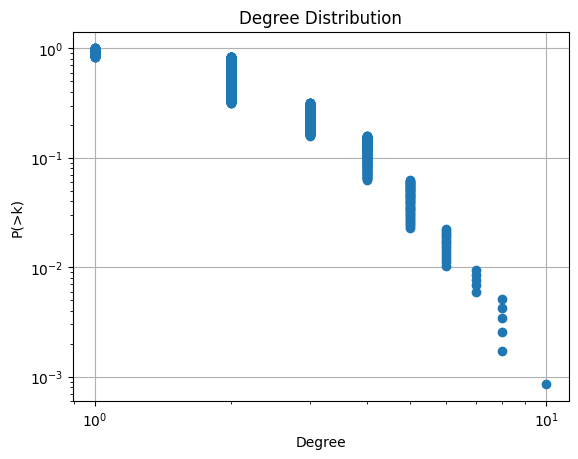

In [9]:
degrees = [d for n, d in G.degree()]
print(f"Grau mínimo: {np.min(degrees)}")
print(f"Grau máximo: {np.max(degrees)}")
print(f"Grau médio: {np.mean(degrees):.2f}")
print(f"Grau mediano: {np.median(degrees)}")

plot_degree_distribution(G)

In [10]:
print(f"Diâmetro do maior componente: {nx.diameter(G_largest)}")
print(f"Distância média: {nx.average_shortest_path_length(G_largest):.2f}")

Diâmetro do maior componente: 62
Distância média: 18.40


In [11]:
print(f"Coeficiente médio de clustering: {nx.average_clustering(G):.4f}")

Coeficiente médio de clustering: 0.0167


In [12]:
n_triangles = count_triangles(G)
n_squares = count_squares(G)

print(f"Número de triângulos: {n_triangles}")
print(f"Número de quadrados: {n_squares}")

Número de triângulos: 96
Número de quadrados: 3
